# VR Thesis | Data Analysis

## Imports / Variables

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
coolors = ["#C1ABA6","#533B4D","#F564A9","#FAA4BD","#FAE3C6"]
coolors.reverse()
coolors2 = ["#0f6a6a","#0a4f4f","#17a2a2","#50c5b7","#87dfdf"]
max_height=259 #variable for bar plots.

In [11]:
df = pd.read_csv("output.csv")
print(df.shape)
df.head(1)

(259, 44)


,How old are you?,You identify as ...,What field are you involved in?,Would you consider yourself as someone with an interest in Technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so,do you own a VR headset?","Based solely on this ad,what seems to be the main use for this VR headset ?","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Gaming]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Simulation and Training]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Productivity]",...,"Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Research and Data Visualization].1","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Education].1","Based on the ad,does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads,did one of them make you feel like owning a Virtual Reality headset?",How much would you be willing to spend on a Virtual Reality Headset?
0,45 - 60,Male,No Tech,4,Yes,No,Gaming,Possible,Not possible,Not possible,...,Possible,Possible,5,3,1,5,No,No,Neither,200-400 €


## Analysis of respondents

### General

In [384]:
df.info

<bound method DataFrame.info of     How old are you? You identify as ... What field are you involved in?  \
0            45 - 60                Male                         No Tech   
1            18 - 28                Male                         No Tech   
2            18 - 28                Male                         No Tech   
3            45 - 60              Female                         No Tech   
4            45 - 60                Male                         No Tech   
..               ...                 ...                             ...   
254          18 - 28              Female                            Tech   
255          18 - 28                Male                         No Tech   
256          18 - 28                Male                            Tech   
257          18 - 28                Male                            Tech   
258          45 - 60                Male                         No Tech   

     Would you consider yourself as someone with an int

In [385]:
df.describe(include="all")

,How old are you?,You identify as ...,What field are you involved in?,Would you consider yourself as someone with an interest in Technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so,do you own a VR headset?","Based solely on this ad,what seems to be the main use for this VR headset ?","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Gaming]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Simulation and Training]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Productivity]",...,"Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Research and Data Visualization].1","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Education].1","Based on the ad,does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads,did one of them make you feel like owning a Virtual Reality headset?",How much would you be willing to spend on a Virtual Reality Headset?
count,259,259,259,259.000000,259,259,259,259,259,259,...,259,259,259.000000,259.000000,259.000000,259.000000,259,259,259,252
unique,4,2,2,NaN,1,2,3,3,3,3,...,3,3,NaN,NaN,NaN,NaN,2,2,4,12
top,18 - 28,Male,No Tech,NaN,Yes,No,Gaming,Possible,Neutral,Neutral,...,Possible,Possible,NaN,NaN,NaN,NaN,Yes,Yes,Neither,200-400 €
freq,155,154,189,NaN,259,252,210,245,105,119,...,161,98,NaN,NaN,NaN,NaN,154,175,112,70
mean,NaN,NaN,NaN,3.969112,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.945946,2.918919,2.675676,3.405405,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.820647,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.869918,1.345819,1.165986,1.128270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.000000,2.000000,2.000000,3.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,3.000000,3.000000,4.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.000000,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN


### Regression

In [386]:
df2 = df.copy()
replacement={"Tech":1,
             "Male":1,
             "Female":-1,
             "No Tech":-1,
            "0 - 18":0,
             "18 - 28":1,
             "45 - 60":3,
             "28 - 45":2,
             "60+":4,
             "Neutral":0,
             "Not possible":-1,
             "Possible":1,
             "Yes":1,
             "No":0,
             "Meta's ad":1,
             "Apple's ad":1,
             "Neither":-2,
             "Both":4,
             }
df2.replace(replacement,inplace=True)

/var/folders/b5/h0kn356947gdkvw9plbj3n6h0000gp/T/ipykernel_1672/887259619.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace(replacement,inplace=True)


In [387]:
df2.dtypes

How old are you?                                                                                                                                 int64
You identify as ...                                                                                                                              int64
What field are you involved in?                                                                                                                  int64
Would you consider yourself as someone with an interest in Technology?                                                                           int64
Do you know what a Virtual Reality (VR) headset is ?                                                                                             int64
If so,do you own a VR headset?                                                                                                                   int64
Based solely on this ad,what seems to be the main use for this VR headset ?                   

In [388]:
df2.drop(columns=df2.select_dtypes(exclude=['float','int64']).columns,inplace=True)
df2.head(2)

,How old are you?,You identify as ...,What field are you involved in?,Would you consider yourself as someone with an interest in Technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so,do you own a VR headset?","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Gaming]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Simulation and Training]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Productivity]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Therapy and Rehabilitation]",...,"Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Art and Creativity].1","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Research and Data Visualization].1","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Education].1","Based on the ad,does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads,did one of them make you feel like owning a Virtual Reality headset?"
0,3,1,-1,4,1,0,1,-1,-1,-1,...,1,1,1,5,3,1,5,0,0,-2
1,1,1,-1,5,1,0,1,0,0,-1,...,1,1,1,4,5,2,4,1,1,1


In [389]:
cols_to_drop = df2.columns[df2.columns.str.contains('Once again')]
df2.drop(cols_to_drop, axis=1, inplace=True)
df2.head(2)

,How old are you?,You identify as ...,What field are you involved in?,Would you consider yourself as someone with an interest in Technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so,do you own a VR headset?","Based on the ad,does this VR headset seem easy to use? [Meta]",Do you feel targeted by this ad? [Meta],"Based on the ad,does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads,did one of them make you feel like owning a Virtual Reality headset?"
0,3,1,-1,4,1,0,5,1,5,3,1,5,0,0,-2
1,1,1,-1,5,1,0,4,3,4,5,2,4,1,1,1


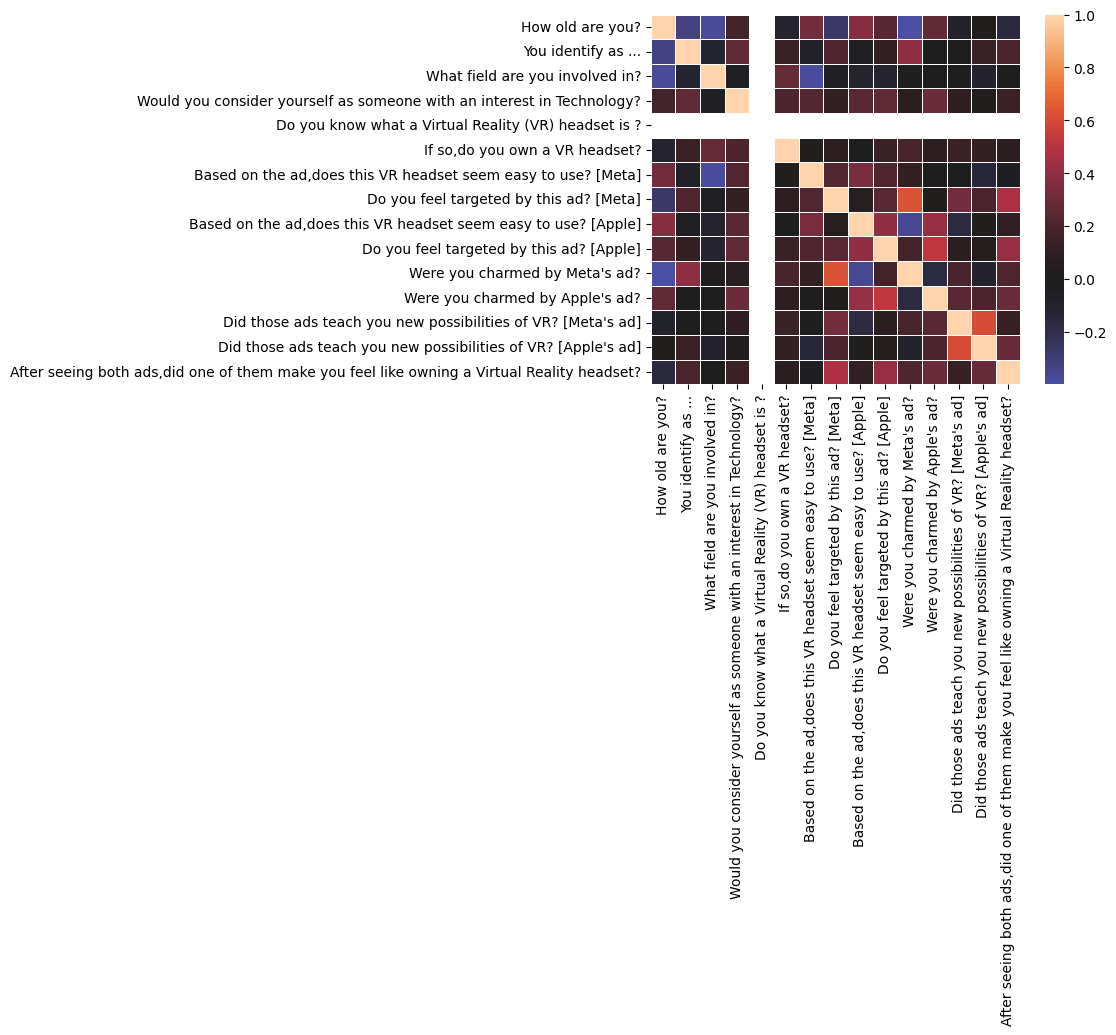

In [390]:
sns.heatmap(df2.corr(),center=0,square=True, linewidths=.5);
# gender / age, gender/field, age,owning

### Pie chart - Gender

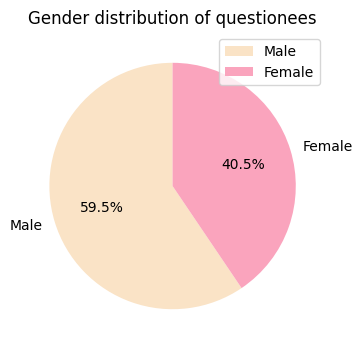

In [391]:
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
wedges, texts, autotexts = plt.pie(df.iloc[:, 1].value_counts(), 
        labels=df.iloc[:, 1].value_counts().index,
        colors=coolors,
        autopct='%1.1f%%', 
        startangle=90)
plt.legend(df.iloc[:, 1].value_counts().index)
plt.title("Gender distribution of questionees")
plt.show()

### Pie Chart - Age

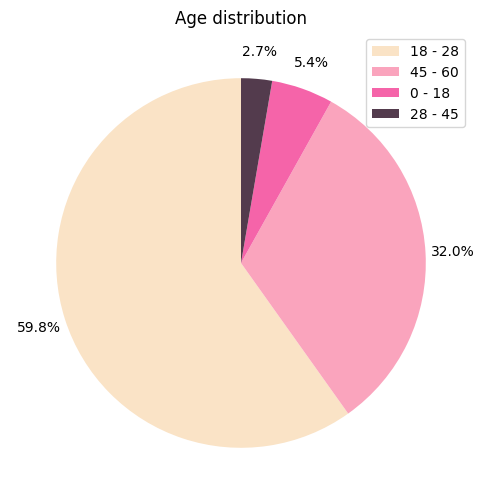

In [392]:
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
wedges, texts, autotexts = plt.pie(df.iloc[:, 0].value_counts(), 
        colors=coolors,
        autopct='%1.1f%%', 
        pctdistance=1.15,
        startangle=90)
plt.legend(df.iloc[:, 0].value_counts().index)
plt.title("Age distribution")
plt.show()

### Pie Chart - Tech

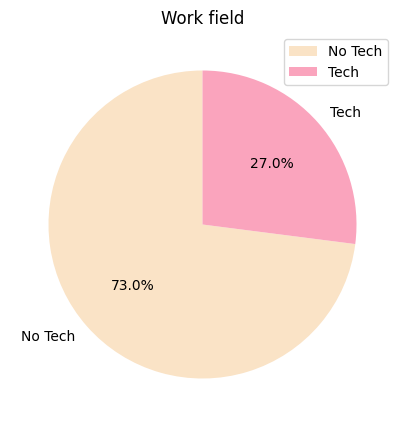

In [393]:
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
wedges, texts, autotexts = plt.pie(df.iloc[:, 2].value_counts(), 
        labels=df.iloc[:, 2].value_counts().index,
        autopct='%1.1f%%', 
        colors=coolors,
        startangle=90)
plt.legend(df.iloc[:, 2].value_counts().index)
plt.title("Work field")
plt.show()

### Bar chart with mean - Interest

In [394]:
df.iloc[:,3].describe()

count    259.000000
mean       3.969112
std        0.820647
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Would you consider yourself as someone with an interest in Technology?, dtype: float64

In [395]:
counts2 = df.groupby(df.iloc[:,3]).size().reset_index(name='Count')


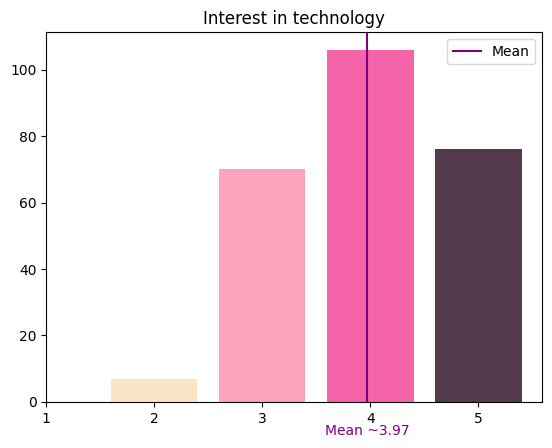

In [396]:
plt.bar(x=counts2.iloc[:,0].astype(int),height=counts2.iloc[:,1],color=coolors)
mean_value = df.iloc[:,3].mean()
plt.axvline(mean_value, color='purple', linestyle='-', label='Mean');
plt.text(mean_value,-10, f'Mean ~{mean_value:.2f}', color='purple', ha='center');
plt.legend();
plt.xticks(range(1,6));
plt.title("Interest in technology");

### Nested Pie Chart - Interest in tech

In [409]:
counts=df.groupby([df.iloc[:, 2], df.iloc[:, 3]]).size().reset_index(name='Count')
counts.head(counts.shape[0])

,What field are you involved in?,Would you consider yourself as someone with an interest in Technology?,Count
0,No Tech,3,56
1,No Tech,4,78
2,No Tech,5,55
3,Tech,2,7
4,Tech,3,14
5,Tech,4,28
6,Tech,5,21


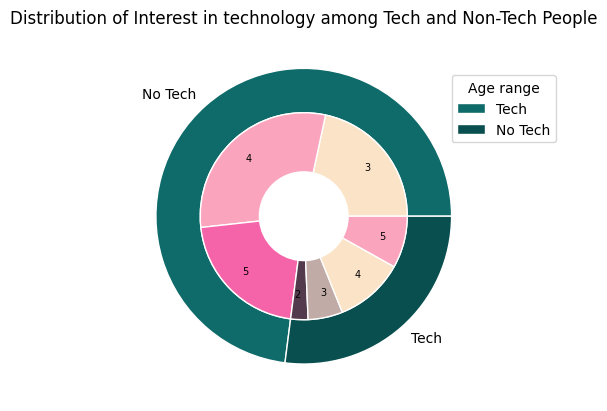

In [410]:
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_sizes = counts.groupby(counts.iloc[:, 0])['Count'].sum()  # Total counts per group
inner_labels = counts.apply(lambda row: f"{row.iloc[1]}", axis=1)  # Labels with both group and interest
inner_sizes = counts['Count']  # Counts for each combination
fig, ax = plt.subplots()
ax.pie(outer_sizes, labels=outer_labels, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'),colors=coolors2)
ax.pie(inner_sizes, labels=inner_labels, labeldistance=0.75,radius=0.7, wedgeprops=dict(width=0.4, edgecolor='w'),colors=coolors,textprops={'fontsize': 7})
plt.legend(counts.iloc[:, 0].value_counts().index, loc=(0.9,0.7)).set_title('Age range')
plt.title('Distribution of Interest in technology among Tech and Non-Tech People')
plt.show()


In [411]:
counts=df.groupby([df.iloc[:, 0], df.iloc[:, 3]]).size().reset_index(name='Count')
counts.head(counts.shape[0])


,How old are you?,Would you consider yourself as someone with an interest in Technology?,Count
0,0 - 18,4,12
1,0 - 18,5,2
2,18 - 28,2,7
3,18 - 28,3,49
4,18 - 28,4,64
5,18 - 28,5,35
6,28 - 45,4,3
7,28 - 45,5,4
8,45 - 60,3,21
9,45 - 60,4,27


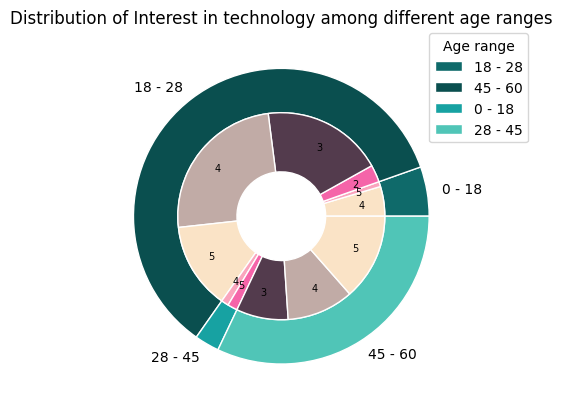

In [412]:
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_sizes = counts.groupby(counts.iloc[:, 0])['Count'].sum()  # Total counts per group
inner_labels = counts.apply(lambda row: f"{row.iloc[1]}", axis=1)  # Labels with both group and interest
inner_sizes = counts['Count']  # Counts for each combination
fig, ax = plt.subplots()
ax.pie(outer_sizes, labels=outer_labels, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'),colors=coolors2)
ax.pie(inner_sizes, labels=inner_labels, labeldistance=0.75,radius=0.7, wedgeprops=dict(width=0.4, edgecolor='w'),colors=coolors,textprops={'fontsize': 7})
plt.legend(counts.iloc[:, 0].value_counts().index, loc=(0.9,0.7)).set_title('Age range')
plt.title('Distribution of Interest in technology among different age ranges')
plt.show()


In [413]:
counts=df.groupby([df.iloc[:, 1], df.iloc[:, 3]]).size().reset_index(name='Count')
counts.head(counts.shape[0])

,You identify as ...,Would you consider yourself as someone with an interest in Technology?,Count
0,Female,2,7
1,Female,3,35
2,Female,4,45
3,Female,5,18
4,Male,3,35
5,Male,4,61
6,Male,5,58


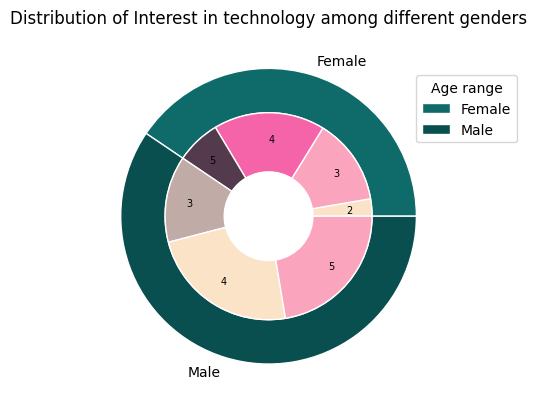

In [414]:
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_labels = counts.iloc[:, 0].unique()  # Unique groups (Tech, Non-Tech)
outer_sizes = counts.groupby(counts.iloc[:, 0])['Count'].sum()  # Total counts per group
inner_labels = counts.apply(lambda row: f"{row.iloc[1]}", axis=1)  # Labels with both group and interest
inner_sizes = counts['Count']  # Counts for each combination
fig, ax = plt.subplots()
ax.pie(outer_sizes, labels=outer_labels, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'),colors=coolors2)
ax.pie(inner_sizes, labels=inner_labels, labeldistance=0.75,radius=0.7, wedgeprops=dict(width=0.4, edgecolor='w'),colors=coolors,textprops={'fontsize': 7})
plt.legend(counts.iloc[:, 0].value_counts().index, loc=(0.9,0.7)).set_title('Age range')
plt.title('Distribution of Interest in technology among different genders')
plt.show()


### Owner of VR

In [452]:
df.groupby(by=df.iloc[:,5]).size()

If so,do you own a VR headset?
No     251
Yes      8
dtype: int64

In [494]:
df.iloc[:,5].unique()

array(['No', 'Yes'], dtype=object)

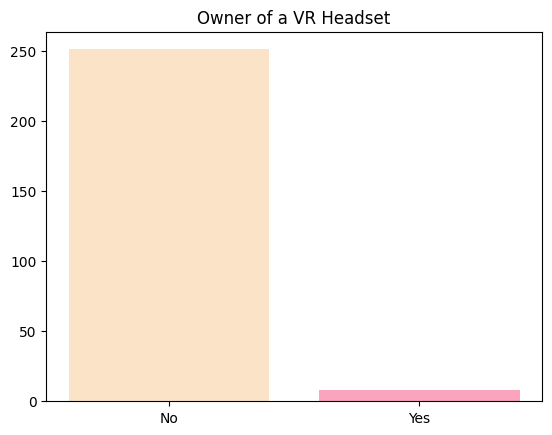

In [497]:
plt.bar(x=df.groupby(by=df.iloc[:,5]).size().index,height=df.groupby(by=df.iloc[:,5]).size(),color=coolors)
plt.title("Owner of a VR Headset");

In [465]:
df[df.iloc[:, 5] == "Yes"]

,How old are you?,You identify as ...,What field are you involved in?,Would you consider yourself as someone with an interest in Technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so,do you own a VR headset?","Based solely on this ad,what seems to be the main use for this VR headset ?","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Gaming]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Simulation and Training]","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Productivity]",...,"Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Research and Data Visualization].1","Once again based solely on this ad,what other actitivties seem accomplishable with this headset? [Education].1","Based on the ad,does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads,did one of them make you feel like owning a Virtual Reality headset?",How much would you be willing to spend on a Virtual Reality Headset?
18,0 - 18,Male,No Tech,5,Yes,Yes,Gaming,Possible,Neutral,Possible,...,Possible,Neutral,5,1,3,3,No,Yes,Both,Ce n'est pas dans mes priorités
39,18 - 28,Male,Tech,5,Yes,Yes,Gaming,Possible,Possible,Neutral,...,Not possible,Neutral,4,4,4,4,Yes,Yes,Apple's ad,500-1000 €
97,18 - 28,Male,Tech,5,Yes,Yes,Gaming,Possible,Possible,Neutral,...,Not possible,Neutral,4,4,4,4,Yes,Yes,Apple's ad,500-1000 €
105,18 - 28,Male,Tech,5,Yes,Yes,Gaming,Possible,Possible,Neutral,...,Not possible,Neutral,4,4,4,4,Yes,Yes,Apple's ad,500-1000 €
219,45 - 60,Male,No Tech,4,Yes,Yes,Gaming,Possible,Not possible,Not possible,...,Possible,Possible,5,3,1,5,No,No,Neither,200-400 €
249,18 - 28,Male,Tech,5,Yes,Yes,Gaming,Possible,Possible,Neutral,...,Not possible,Neutral,4,4,4,4,Yes,Yes,Apple's ad,500-1000 €
256,18 - 28,Male,Tech,5,Yes,Yes,Gaming,Possible,Possible,Neutral,...,Not possible,Neutral,4,4,4,4,Yes,Yes,Apple's ad,500-1000 €
257,18 - 28,Male,Tech,5,Yes,Yes,Gaming,Possible,Possible,Neutral,...,Not possible,Neutral,4,4,4,4,Yes,Yes,Apple's ad,500-1000 €


## Analysis of the ads

### Main use case

/var/folders/b5/h0kn356947gdkvw9plbj3n6h0000gp/T/ipykernel_1052/2301947787.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(heights1.index, rotation=67, ha='right', fontsize=11);
/var/folders/b5/h0kn356947gdkvw9plbj3n6h0000gp/T/ipykernel_1052/2301947787.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(heights2.index, rotation=67, ha='right', fontsize=11);


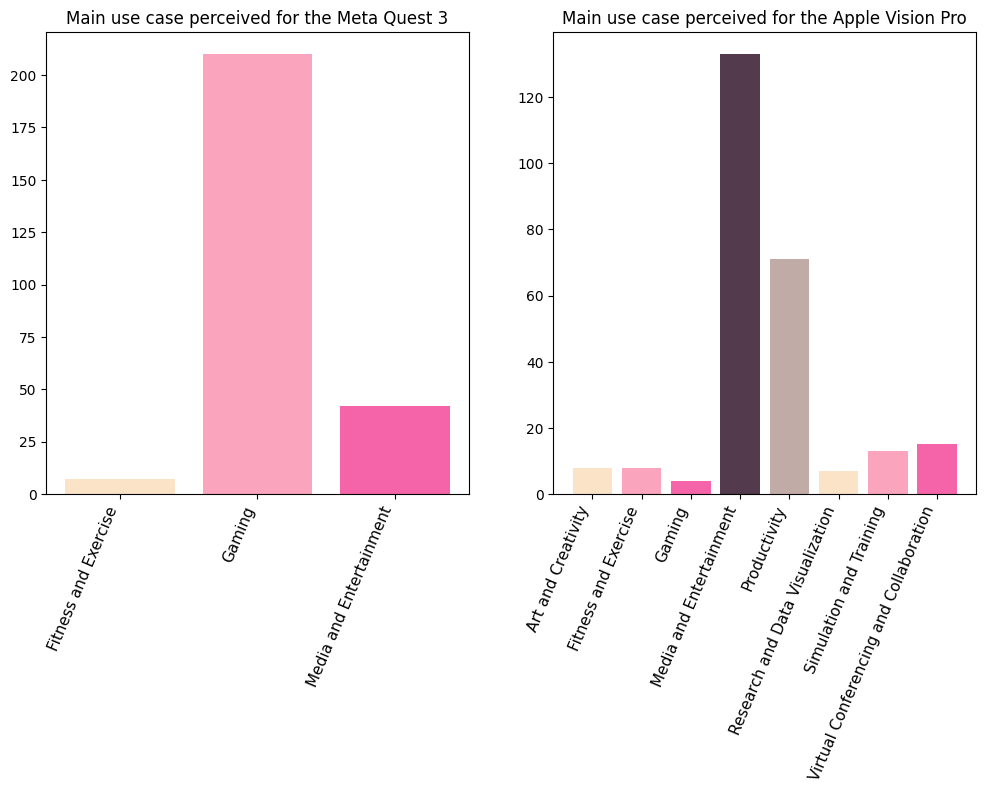

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 6
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=67, ha='right', fontsize=11);
axs[0].set_title("Main use case perceived for the Meta Quest 3");

# Second bar plot
var2 = var1+16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=67, ha='right', fontsize=11);
axs[1].set_title("Main use case perceived for the Apple Vision Pro");

# Adjust layout

plt.show();

In [13]:
df.groupby(by=df.iloc[:, 22]).size()

Based solely on this ad,what seems to be the main use for this VR headset ?.1
Art and Creativity                          8
Fitness and Exercise                        8
Gaming                                      4
Media and Entertainment                   133
Productivity                               71
Research and Data Visualization             7
Simulation and Training                    13
Virtual Conferencing and Collaboration     15
dtype: int64

### Other use cases

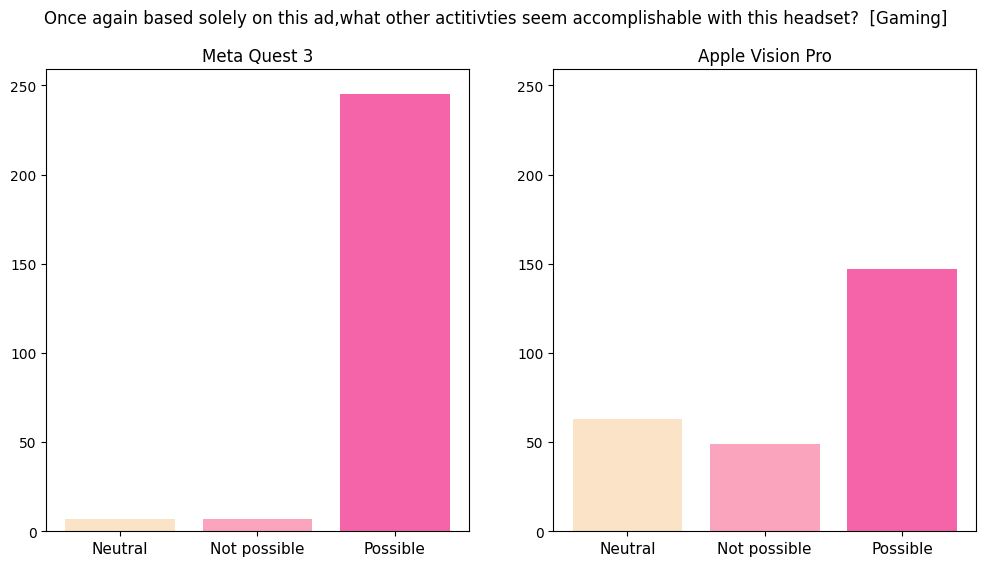

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 7
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

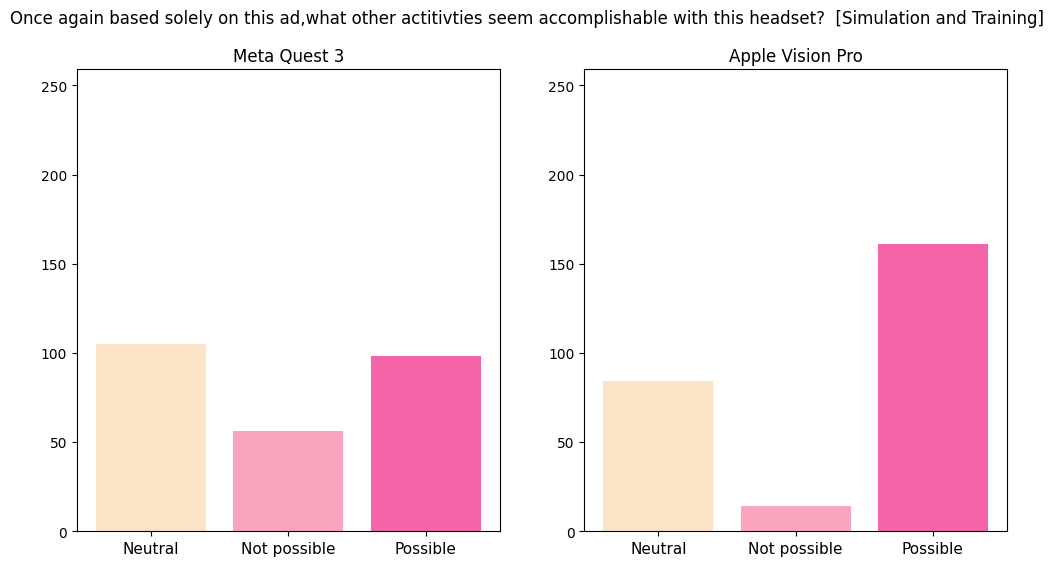

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 8
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

In [60]:
df.groupby(by=df.iloc[:, var1]).size()

Once again based solely on this ad,what other actitivties seem accomplishable with this headset?  [Simulation and Training]
Neutral         105
Not possible     56
Possible         98
dtype: int64

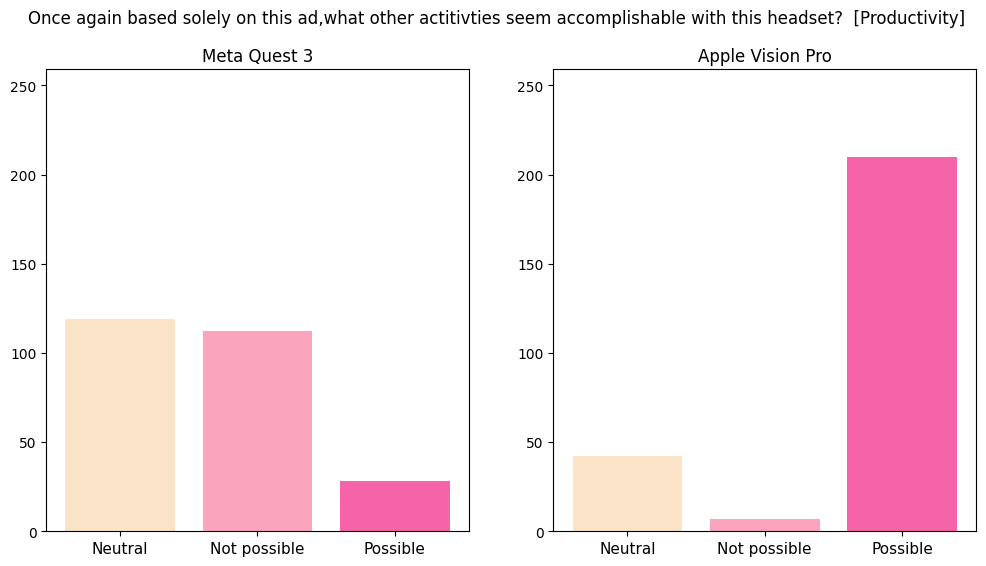

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 9
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

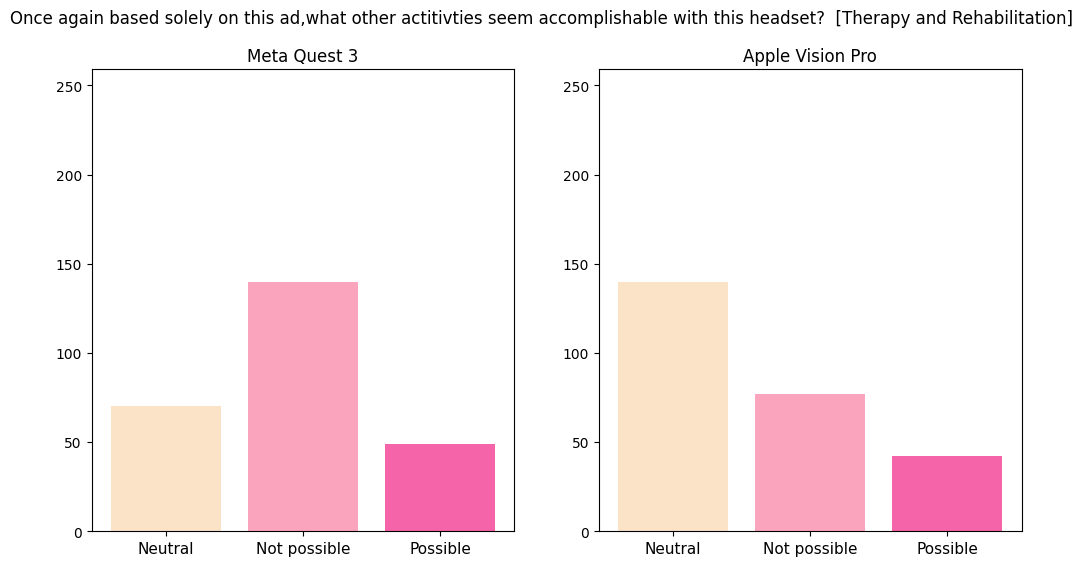

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 10
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

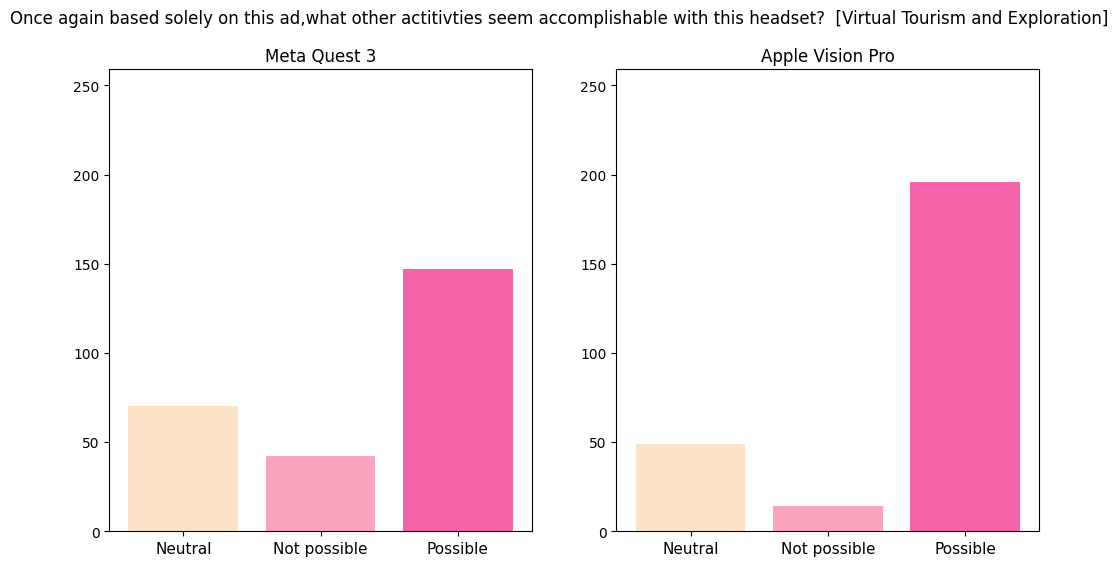

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 11
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

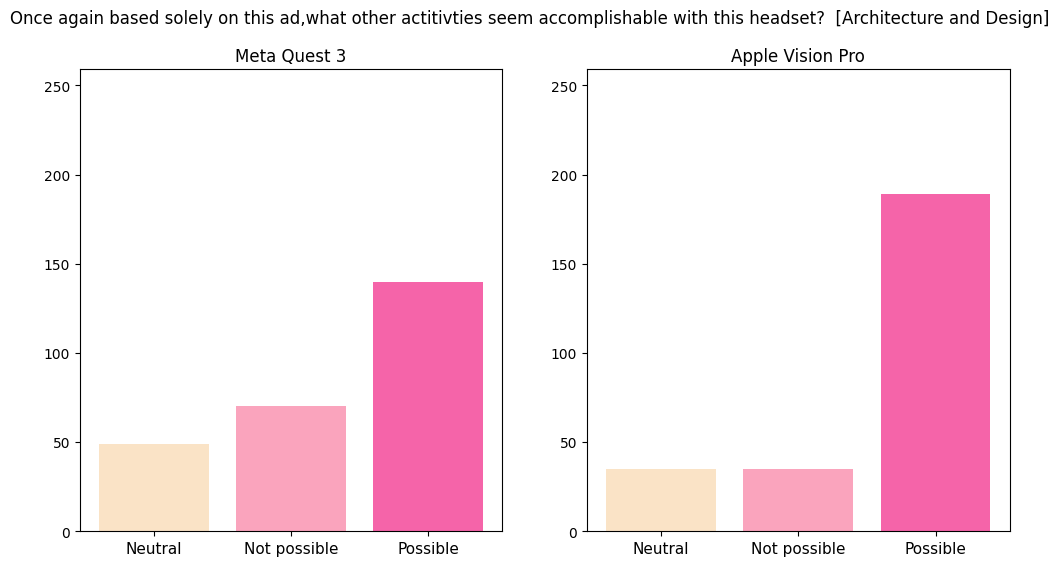

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 12
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

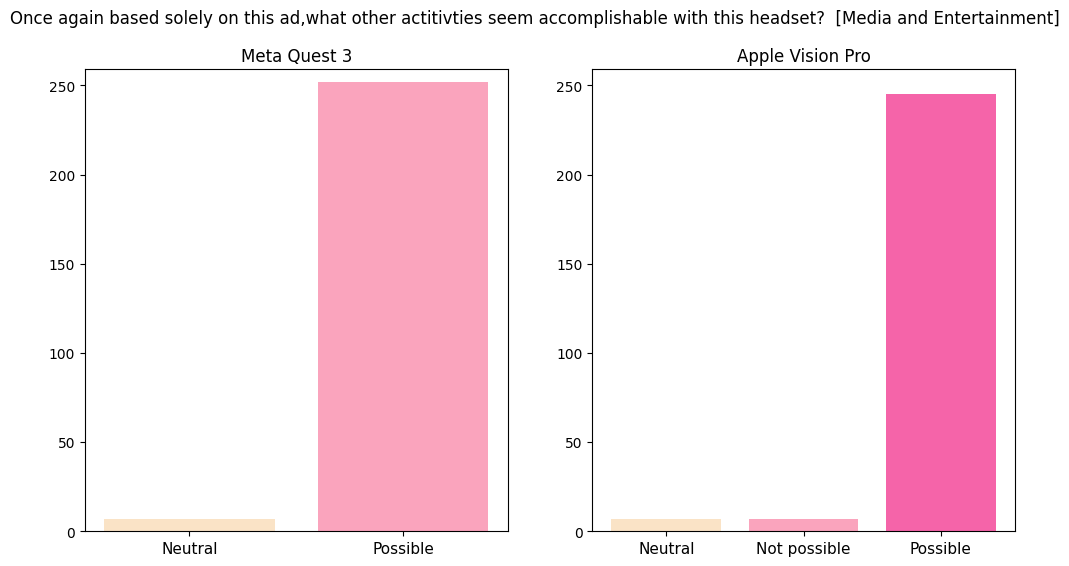

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 13
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

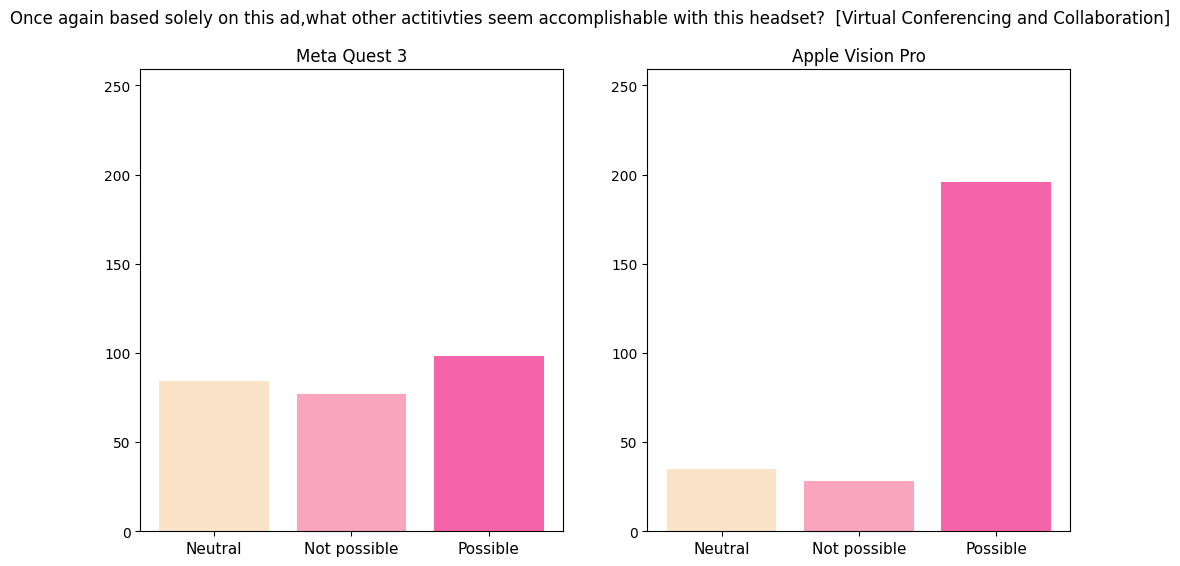

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 14
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

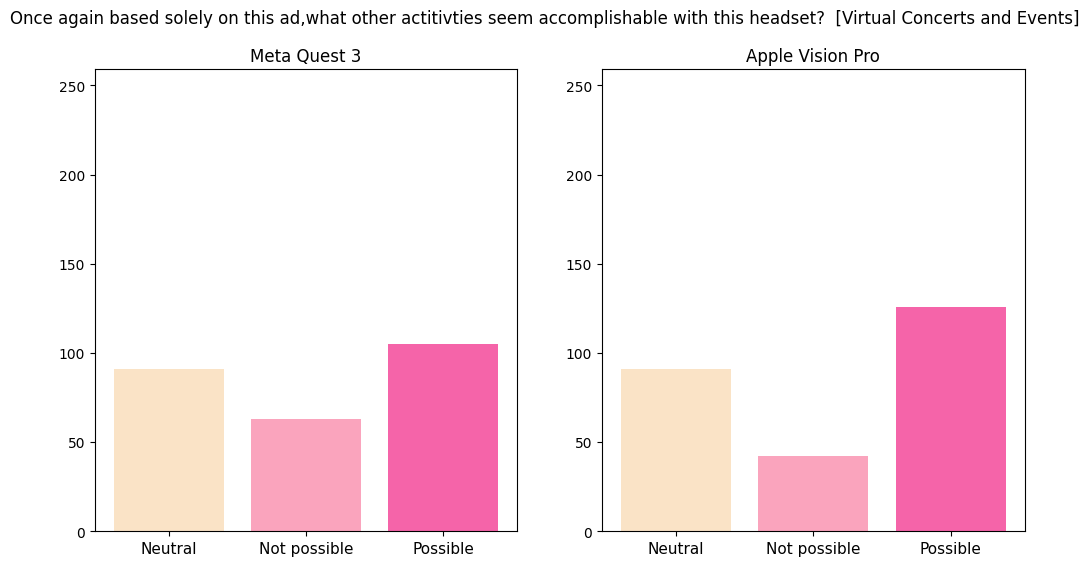

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 15
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

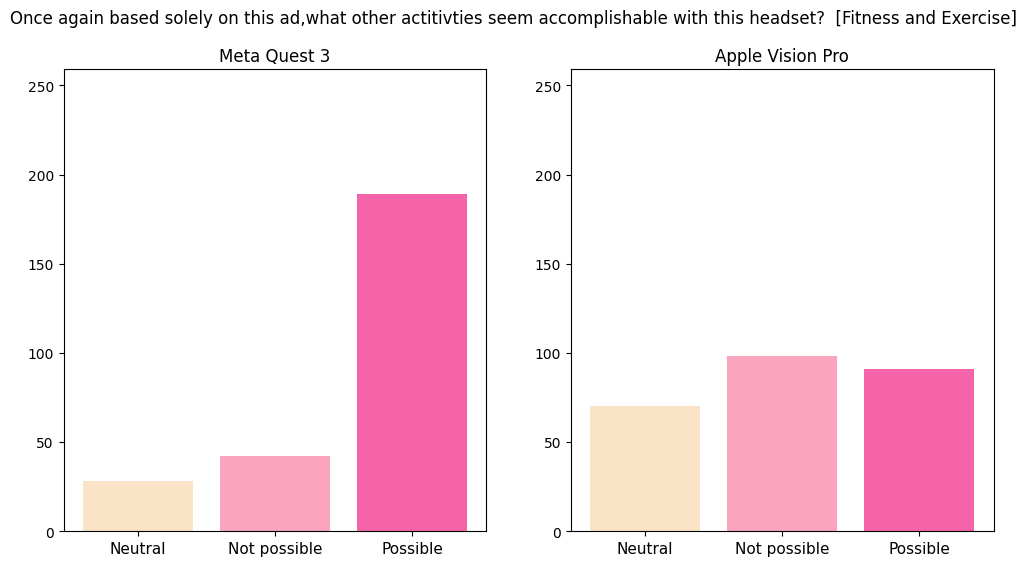

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 16
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

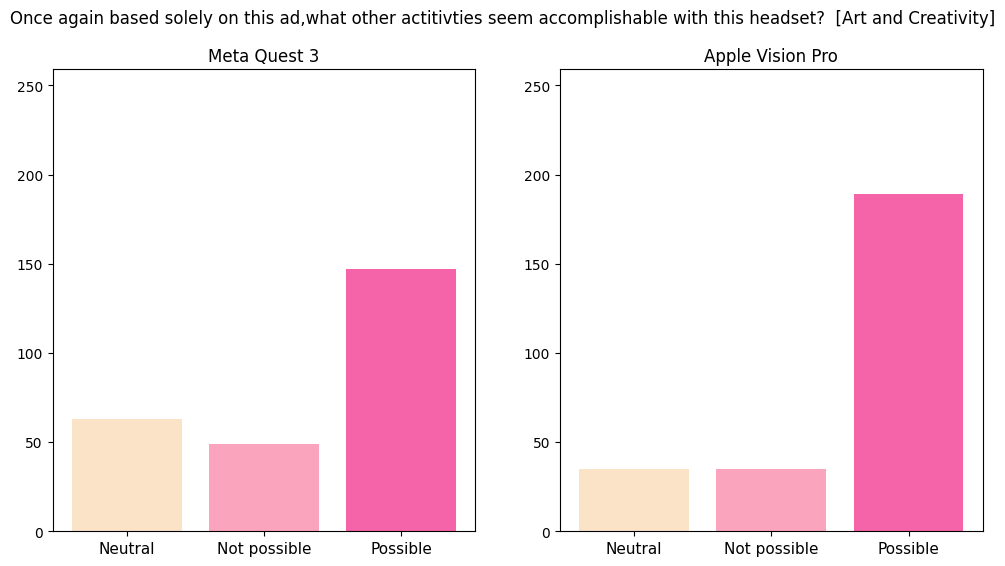

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 17
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

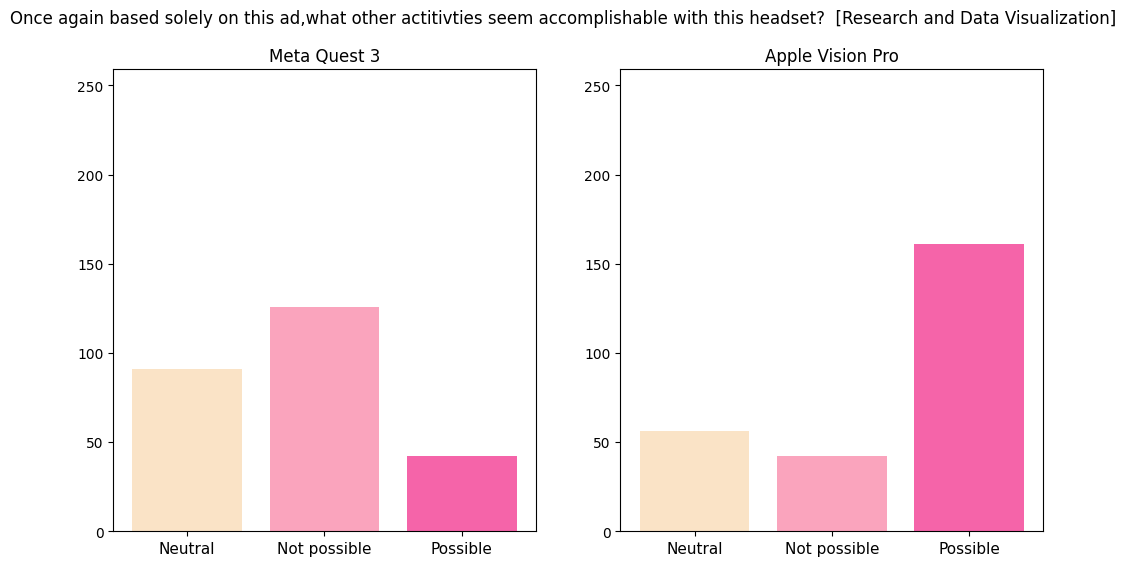

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 18
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

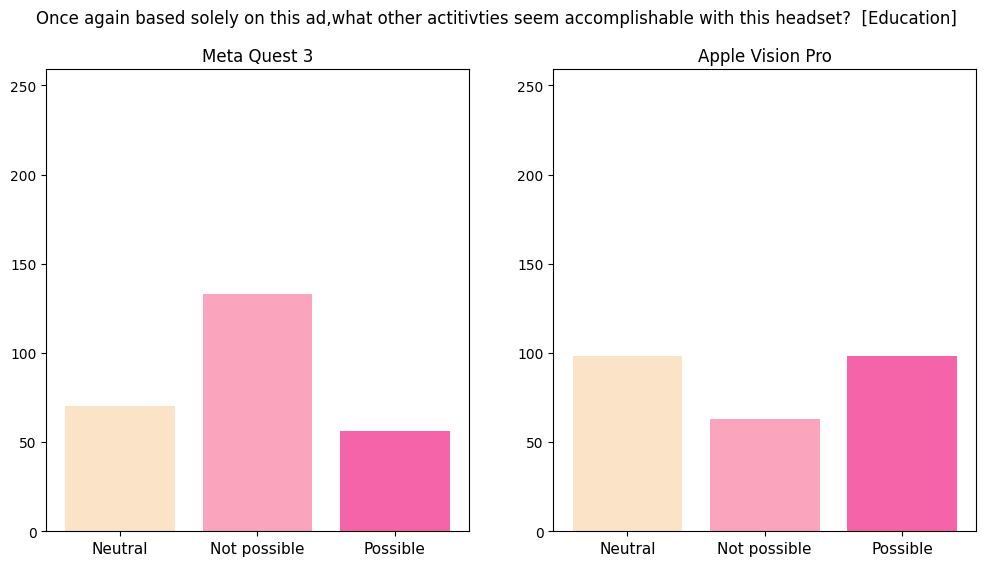

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 19
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index, height=heights1.values, color=coolors);
axs[0].set_xticklabels(heights1.index, rotation=0, ha='center', fontsize=11);
axs[0].set_title("Meta Quest 3");

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors);
axs[1].set_xticklabels(heights2.index, rotation=0, ha='center', fontsize=11);
axs[1].set_title("Apple Vision Pro");

axs[0].set_ylim(0, max_height)
axs[1].set_ylim(0, max_height)

fig.suptitle(df.columns[var1])

plt.show();

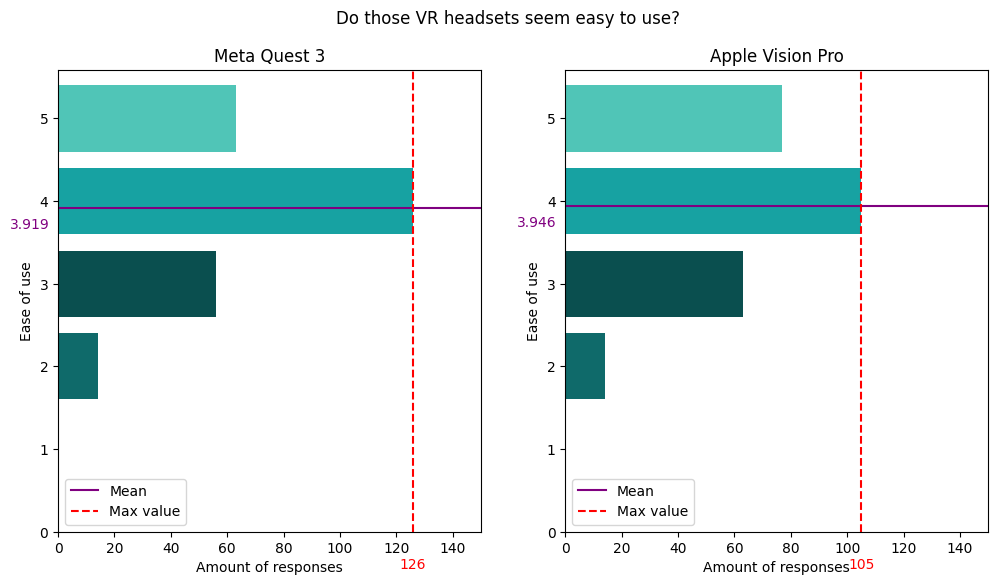

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 20
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].barh(y=heights1.index.astype(int), width=heights1.values, color=coolors2);
axs[0].set_title("Meta Quest 3");
axs[0].set_yticks(range(0,6));
axs[0].set_xlim(0, 150)
mean_value = df.iloc[:,var1].mean()
axs[0].axhline(mean_value, color='purple', linestyle='-', label='Mean');
axs[0].axvline(heights1.get(4), color='red', linestyle='--', label='Max value');
axs[0].text(x=-10,y=mean_value-0.25, s=f'{mean_value:.3f}', color='purple', ha='center');
axs[0].text(x=heights1.get(4),y=-0.45, s=heights1.get(4), color='red', ha='center');

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].barh(y=heights2.index, width=heights2.values, color=coolors2);
axs[1].set_title("Apple Vision Pro");
axs[1].set_yticks(range(0,6));
axs[1].set_xlim(0,150)
mean_value2 = df.iloc[:,var2].mean()
axs[1].axhline(mean_value2, color='purple', linestyle='-', label='Mean');
axs[1].axvline(heights2.get(4), color='red', linestyle='--', label='Max value');
axs[1].text(x=-10,y=mean_value2-0.25, s=f'{mean_value2:.3f}', color='purple', ha='center');
axs[1].text(x=heights2.get(4),y=-0.45, s=heights2.get(4), color='red', ha='center');


fig.suptitle("Do those VR headsets seem easy to use?")
axs[0].legend(loc='lower left')
axs[1].legend(loc='lower left')
axs[0].set_ylabel("Ease of use")
axs[1].set_ylabel("Ease of use")
axs[0].set_xlabel("Amount of responses")
axs[1].set_xlabel("Amount of responses")
plt.show();



In [169]:
a=df.groupby(by=df.iloc[:, var2]).size()

In [176]:
a.get(4)

105

In [111]:
df.iloc[:,var1].describe()

count    259.000000
mean       3.918919
std        0.819570
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Based on the ad,does this VR headset seem easy to use? [Meta], dtype: float64

In [110]:
df.iloc[:,var2].describe()

count    259.000000
mean       3.945946
std        0.869918
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Based on the ad,does this VR headset seem easy to use? [Apple], dtype: float64

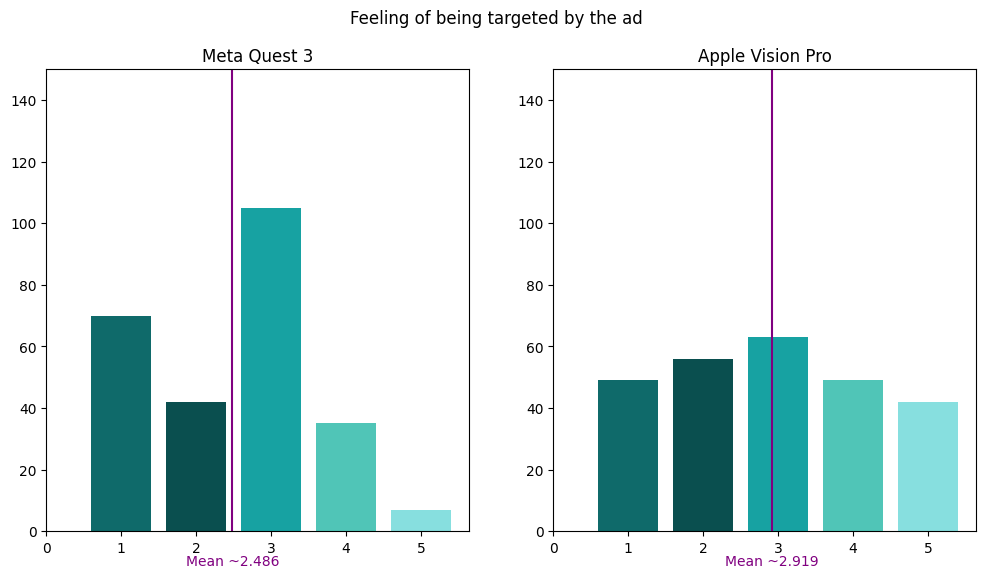

In [210]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First bar plot
var1 = 21
heights1 = df.groupby(by=df.iloc[:, var1]).size()
axs[0].bar(x=heights1.index.astype(int), height=heights1.values, color=coolors2);
axs[0].set_title("Meta Quest 3");
axs[0].set_xticks(range(0,6));
axs[0].set_ylim(0, 150)
mean_value = df.iloc[:,var1].mean()
axs[0].axvline(mean_value, color='purple', linestyle='-', label='Mean');
axs[0].text(mean_value,-11, f'Mean ~{mean_value:.3f}', color='purple', ha='center');

# Second bar plot
var2 = var1 + 16
heights2 = df.groupby(by=df.iloc[:, var2]).size()
axs[1].bar(x=heights2.index, height=heights2.values, color=coolors2);
axs[1].set_title("Apple Vision Pro");
axs[1].set_xticks(range(0,6));
axs[1].set_ylim(0, 150)
mean_value2 = df.iloc[:,var2].mean()
axs[1].axvline(mean_value2, color='purple', linestyle='-', label='Mean');
axs[1].text(mean_value2,-11, f'Mean ~{mean_value2:.3f}', color='purple', ha='center');

fig.suptitle("Feeling of being targeted by the ad")

plt.show();
